In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [41]:
data=pd.read_csv(r'C:\Users\manju\Desktop\ICTAK DSA\DATA SETS\csv\car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [43]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [44]:
data.shape

(112, 2)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [46]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [47]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [48]:
## Data visualization/Outlier detection using boxplot
#lowerfence=Q1-(1.5*IQR),Q1 is 25th percentile
#upperfence=Q3+(1.5*IQR),Q3 is 75th percentile
#IQR=Q3-Q1

<AxesSubplot:>

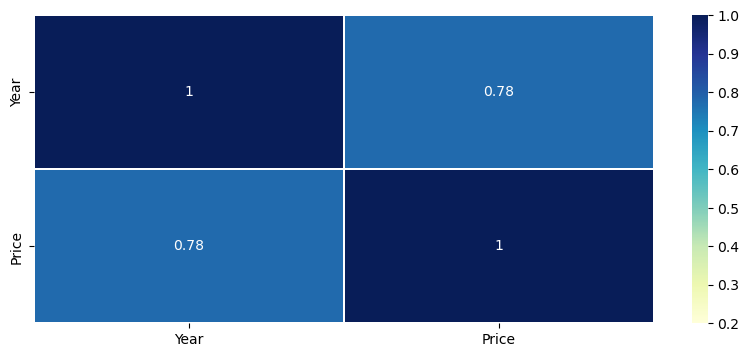

In [49]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=0.2,vmax=1,linewidth=0.3,cmap='YlGnBu')

In [50]:
#finding outliers

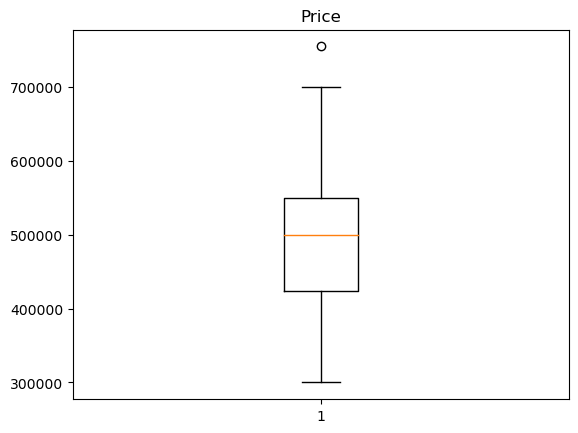

In [17]:
for i in ['Price']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [51]:

Q1=data.Price.quantile(0.25)
Q3=data.Price.quantile(0.75)
IQR=stats.iqr(data.Price,interpolation='midpoint')
IQR

127500.0

In [52]:
lowerfence=Q1-1.5*IQR
upperfence=Q3+1.5*IQR
print(lowerfence)
print(upperfence)

232500.0
741250.0


In [53]:
data.loc[data.Price<lowerfence]

,Year,Price


In [54]:
data.loc[data.Price>upperfence]

,Year,Price
1,2019,755000


In [55]:
#outlier
outlier=[]
for i in data['Price']:
    if(i<lowerfence or i>upperfence):
        outlier.append(i)

In [56]:
for i in outlier:
    print(i)

755000


In [57]:
ind1=data['Price']<lowerfence
data.loc[ind1].index

Int64Index([], dtype='int64')

In [58]:
ind2=data['Price']>upperfence
data.loc[ind2].index

Int64Index([1], dtype='int64')

In [59]:
data1=data.drop([1])
data1.head()

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000


In [62]:
data1.shape

(111, 2)

In [61]:
data1['Price'].nunique()

34

# Regression Analysis

#Linear regression


In [63]:
data1.head()

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000


In [64]:
corr_mat=data1.corr()
corr_mat

,Year,Price
Year,1.000000,0.776449
Price,0.776449,1.000000


In [65]:
#classifying predictor and target
x=data1.drop(['Price'],axis=1)
y=data1['Price']#target or dependent 

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [67]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [68]:
y_pred=model.predict(x_test)
y_pred

array([420717.81628218, 539777.20294216, 420717.81628218, 420717.81628218,
       500090.74072216, 420717.81628218, 500090.74072216, 579463.66516216,
       619150.12738214, 500090.74072216, 420717.81628218, 381031.35406218,
       539777.20294216, 420717.81628218, 500090.74072216, 500090.74072216,
       500090.74072216, 341344.8918422 , 460404.27850218, 579463.66516216,
       579463.66516216, 500090.74072216, 500090.74072216, 500090.74072216,
       500090.74072216, 500090.74072216, 460404.27850218, 420717.81628218])

In [71]:
#y_test

In [72]:
from sklearn.metrics import mean_squared_error
print("MSE=",mean_squared_error(y_test,y_pred))

MSE= 2718820563.070597


In [73]:
from sklearn.metrics import r2_score

print("r2 _score",r2_score(y_test,y_pred))

r2 _score 0.6727697922779439


# Lasso Regression

In [78]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import metrics

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    111 non-null    int64
 1   Price   111 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


In [76]:
x=data1.drop(['Price'],axis=1)
y=data1['Price']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [80]:
Lasso_reg_model=Lasso()

In [81]:
Lasso_reg_model.fit(x_train,y_train)

Lasso()

In [82]:
training_data_pred=Lasso_reg_model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score

In [83]:
from sklearn.metrics import mean_squared_error,r2_score

In [100]:
y_pred=Lasso_reg_model.predict(x_test)

In [101]:
error_score=metrics.r2_score(y_test,training_data_pred)
print("mean squared error=",mean_squared_error(y_test,y_pred))
print("R squared value=",r2_score(y_test,y_pred))

mean squared error= 2360749599.6382856
R squared value= 0.7087650258184441


In [88]:
#predictions in 2022
y_pred


array([418695.74736297, 541197.8959669 , 418695.74736297, 418695.74736297,
       500363.84643225, 418695.74736297, 500363.84643225, 582031.94550155,
       622865.99503618, 500363.84643225, 418695.74736297, 377861.69782832,
       541197.8959669 , 418695.74736297, 500363.84643225, 500363.84643225,
       500363.84643225, 337027.64829369, 459529.79689762, 582031.94550155,
       582031.94550155, 500363.84643225, 500363.84643225])

# 2022 prediction

In [116]:
intercept=Lasso_reg_model.intercept_
intercept

-81861914.06494312

In [110]:
slope=Lasso_reg_model.coef_
slope

array([40834.04953464])

In [115]:
def myfunc(x):
    return slope*x+intercept
price=myfunc(2022)
print('price=',price)

price= [704534.09410547]
